# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [260]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [261]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [262]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [263]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [264]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

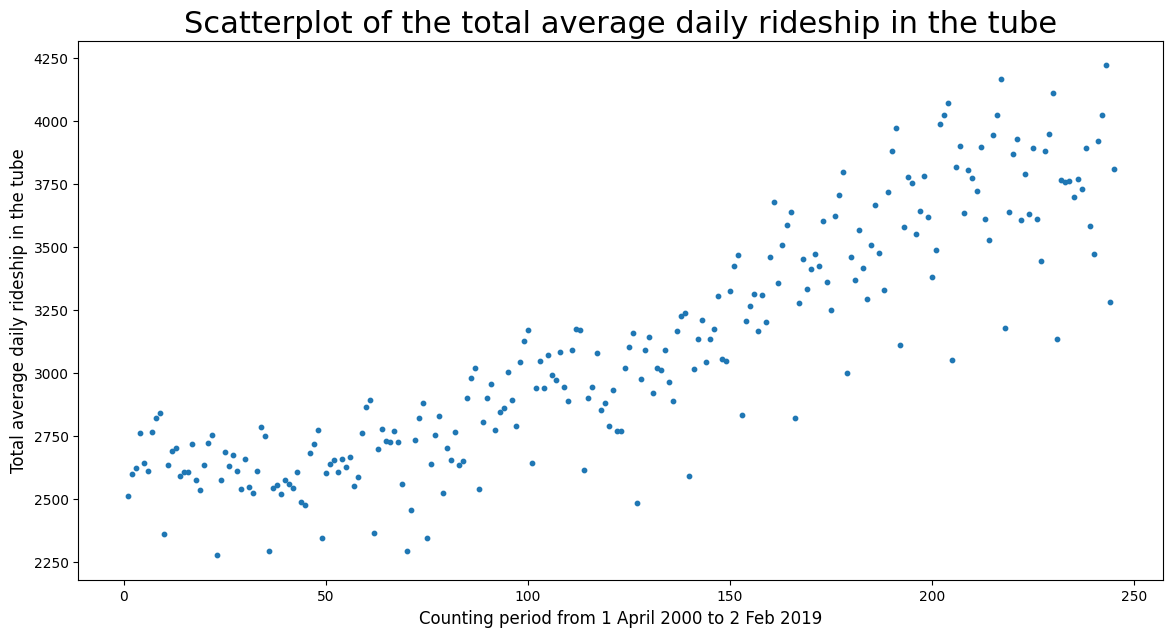

In [265]:
#Your code for scatterplot here
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.scatter(xvals, yvals, s=10)
plt.xlabel('Counting period from 1 April 2000 to 2 Feb 2019')
plt.ylabel('Total average daily rideship in the tube')
plt.title('Scatterplot of the total average daily rideship in the tube')
plt.show()

## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

The value of beta_1 is 2367.382 and the value of beta_1 is 5.939
The MSE of the linear model is 45323.636
The R^2 coefficient of the linear model is 0.796


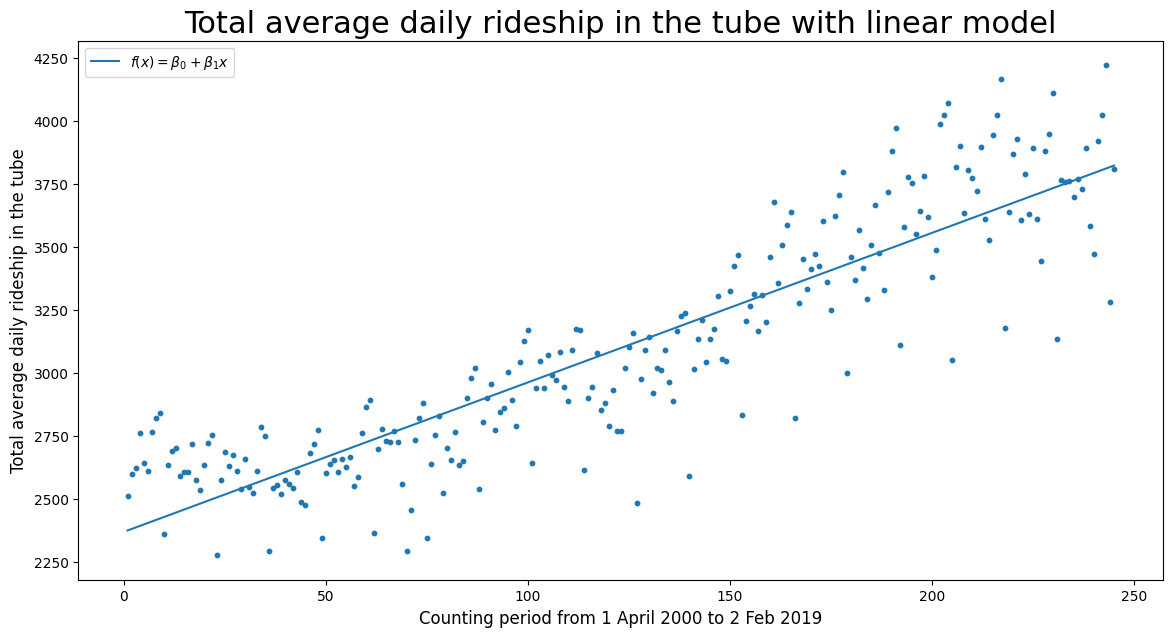

In [266]:
# Form the X matrix with columns 1 and x for x in dates.
all_ones = np.ones(np.shape(xvals))
X = np.column_stack((all_ones, xvals))
XT = np.transpose(X)

# Calculate the beta vector, where beta_vec = [beta_0, beta_1] and print it
beta_vec = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvals))
print("The value of beta_1 is", np.round(beta_vec[0],3), "and the value of beta_1 is", np.round(beta_vec[1], 3))

# Compute and print the MSE, which is MSE = SSE/N:
SSE = np.linalg.norm(yvals - X.dot(beta_vec))**2
MSE = SSE/(np.size(yvals))
print("The MSE of the linear model is", np.round(MSE,3))

# Compute and print the R^2 coefficient
fit_0 = np.mean(yvals)*all_ones 
SSE_0 = np.linalg.norm(yvals - fit_0)**2
R2 = 1 - SSE/SSE_0
print("The R^2 coefficient of the linear model is", np.round(R2,3))


plt.scatter(xvals, yvals, s=10)
plt.xlabel('Counting period from 1 April 2000 to 2 Feb 2019')
plt.ylabel('Total average daily rideship in the tube')
plt.plot(xvals, beta_vec[0] + beta_vec[1]*xvals, label="$f(x) = \\beta_0 + \\beta_1x$")
plt.legend()
plt.title('Total average daily rideship in the tube with linear model')
plt.show()

fit = X.dot(beta_vec)

## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

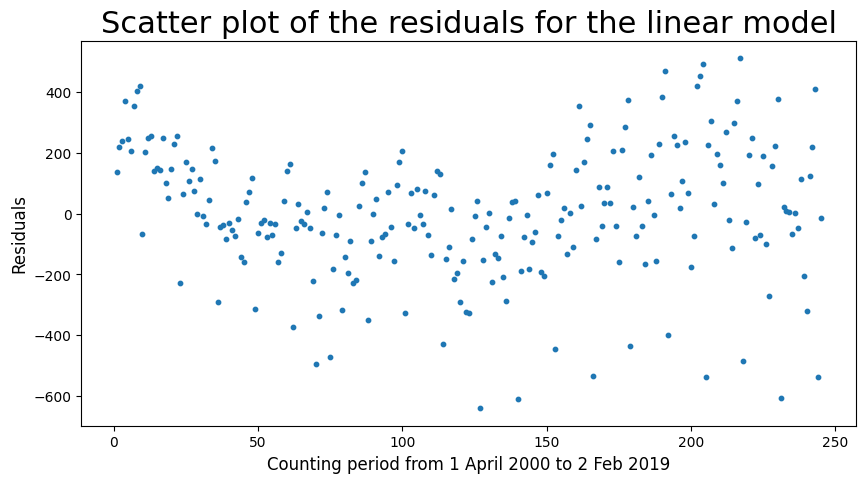

In [267]:
#Compute the residuals
resid = yvals - X.dot(beta_vec)

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(xvals, resid, s=10)
plt.xlabel('Counting period from 1 April 2000 to 2 Feb 2019')
plt.ylabel('Residuals')
plt.title("Scatter plot of the residuals for the linear model")
plt.show()

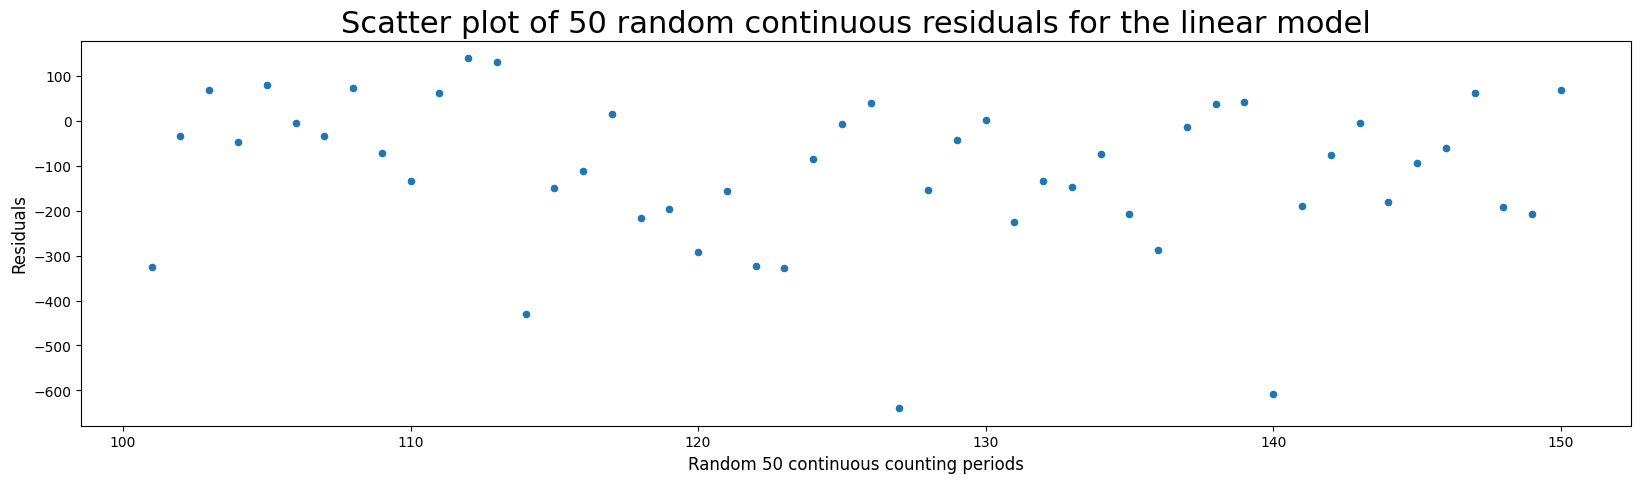

In [268]:
# Compute the residuals over a counting period of 50
plt.rcParams['figure.figsize'] = [20, 5]
plt.scatter(xvals[100:150], resid[100:150], s=20)
plt.xlabel('Random 50 continuous counting periods')
plt.ylabel('Residuals')
plt.title("Scatter plot of 50 random continuous residuals for the linear model")
plt.show()

< Comment on periodic components here >

There appears to be a big decrease of rideship in the tube every 10/12 counting periods, and in between these troughs an M-shaped peak of the same frequency

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


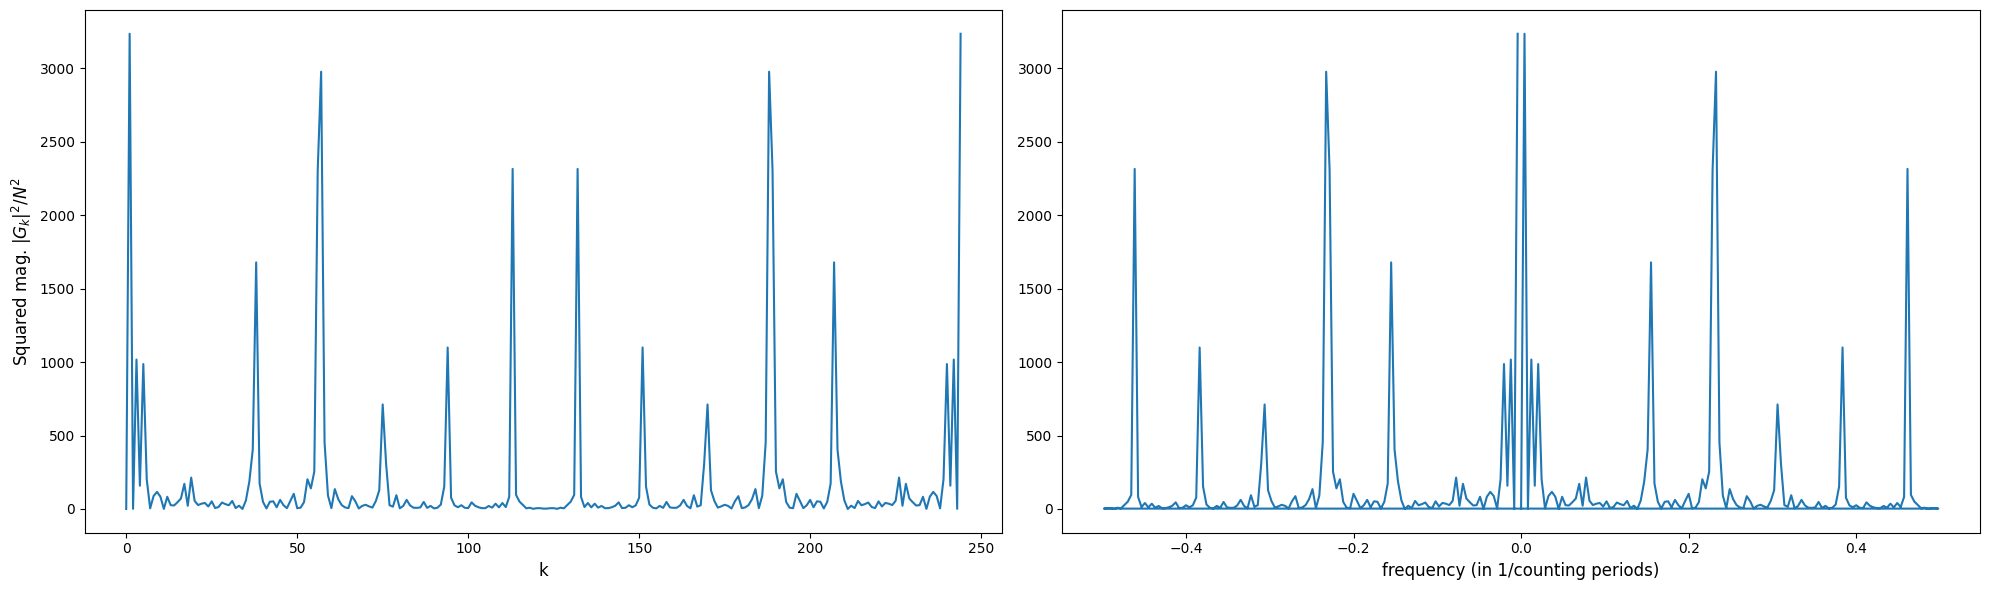

In [269]:
# Your code to compute and plot the periodogram
N = np.size(xvals)
T = 1 #counting period

# Compute the squared magnitudes of the DFT coefficients -- this is known as the "periodogram"
pgram = np.abs(np.fft.fft(resid, N)/N)**2 #We normalize by N, but this is optional
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = np.fft.fftfreq(N)/T

plt.rcParams['figure.figsize'] = [20, 6]
plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency (in 1/counting periods)')  # Since units of T is in counting periods
plt.tight_layout()

In [270]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds)
print('Top frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.]
Top frequencies in Hz: [ 0.00408163  0.15510204  0.22857143  0.23265306  0.46122449 -0.46122449
 -0.23265306 -0.22857143 -0.15510204 -0.00408163]


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 

All numerical outputs should be displayed to three decimal places.

In [271]:
# Convert the positive frequencies to angular frequency
w = 2*math.pi*top_freqs_hz[0:5]

# Create XT matrix by adding 2 columns for every w -> sin(w[i]x) and cos(w[i]x)
XT = []
for i in w:
    XT.append(np.array(np.sin(i*xvals)))
    XT.append(np.array(np.cos(i*xvals)))
XT = np.array(XT)
X = np.transpose(XT)

# Calculate and print the beta vector coefficients
res_vec = np.linalg.inv(XT.dot(X)).dot(XT.dot(resid))
print("Sine regression coefficients for the model:")
for i in range(0, 2*len(w), 2):
    j = i/2
    print("\t beta_s"+str(int(j+1))+" = "+str(np.round(res_vec[i], decimals=3)))
print("Cosine regression coefficients for the model:")
for i in range(1, 2*len(w), 2):
    j = i/2
    print("\t beta_c"+str(int(j+1))+" = "+str(np.round(res_vec[i], decimals=3)))

fit_sc = X.dot(res_vec)

Sine regression coefficients for the model:
	 beta_s1 = -51.253
	 beta_s2 = 61.628
	 beta_s3 = -15.581
	 beta_s4 = 81.659
	 beta_s5 = 32.472
Cosine regression coefficients for the model:
	 beta_c1 = 101.556
	 beta_c2 = -54.006
	 beta_c3 = -94.797
	 beta_c4 = 72.381
	 beta_c5 = 90.589


### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

The MSE of the model is 20297.501
The R^2 coefficient of the linear model is 0.908


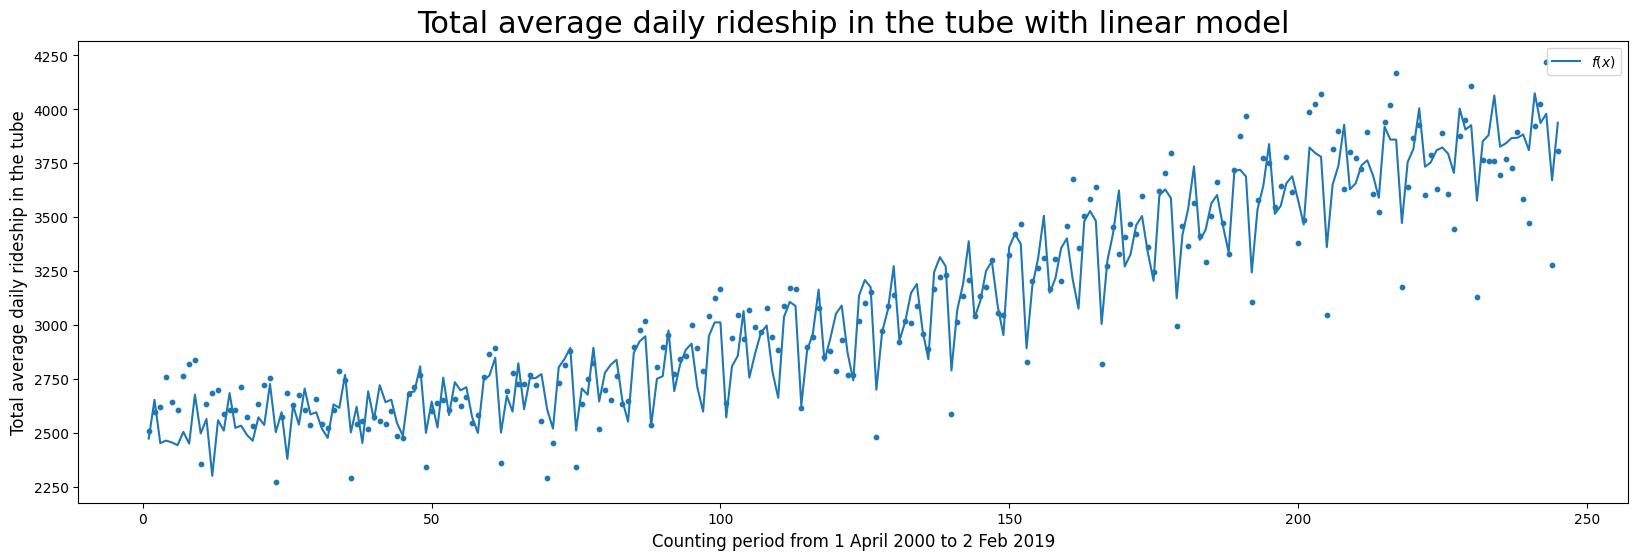

In [272]:
fit_t = fit + fit_sc

# Compute and print the MSE
SSE = np.linalg.norm(yvals - fit_t)**2
MSE = SSE/(np.size(yvals))
print("The MSE of the model is", np.round(MSE,3))

# Compute and print the R^2 coefficient
fit_0 = np.mean(yvals)*all_ones 
SSE_0 = np.linalg.norm(yvals - fit_0)**2
R2 = 1 - SSE/SSE_0
print("The R^2 coefficient of the linear model is", np.round(R2,3))

# Plot the scatterplot with the combined fit
plt.scatter(xvals, yvals, s=10)
plt.xlabel('Counting period from 1 April 2000 to 2 Feb 2019')
plt.ylabel('Total average daily rideship in the tube')
plt.plot(xvals, fit_t, label="$f(x)$")
plt.legend()
plt.title('Total average daily rideship in the tube with linear model')
plt.show()

< Add comment on the improvement over the linear fit. >

The combined fit is roughly 100% more accurate than the linear fit, as the new MSE halved. Furthermore, the $R^2$ coefficient went up by approximately 0.1, which is good. The overall trend on the combinded fit seems to be a much better fit than the linear one, however the higher frequency residuals don't seem to be accounted for that well by the sinosoids in the combined fit. This suggests that maybe daily rideship cannot be modelled using only sinosoids.